# 1. Алгоритм Apriori 

In [68]:
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
def get_frequent_sets(transactions, min_support):
    """ Метод для нахождения частых наборов по алгоритму Априори """
    transactions = [set(lst) for lst in transactions]

    item_count = {}

    for transaction in transactions:
        for item in transaction:
            item_count[item] = item_count.get(item, 0) + 1

    transactions_count = len(transactions)
    result_frequent_sets = {
        frozenset([item]): count for item, count in item_count.items()
        if count / transactions_count >= min_support
    }

    set_size = 2
    candidate_sets = generate_candidates_sets(result_frequent_sets.keys(), set_size)
    result_frequent_sets = {}
    while candidate_sets:
        item_count = {}

        for transaction in transactions:
            for candidate in candidate_sets:
                if candidate.issubset(transaction):
                    item_count[candidate] = item_count.get(candidate, 0) + 1

        candidate_sets = {
            itemset: count for itemset, count in item_count.items()
            if count / transactions_count >= min_support
        }

        result_frequent_sets.update(candidate_sets)

        set_size += 1

        candidate_sets = generate_candidates_sets(result_frequent_sets.keys(), set_size)

    return result_frequent_sets

In [70]:
def generate_candidates_sets(frequent_sets, set_size):
    """ Декартово произведение множества частых наборов на себя """
    candidates = set()
    sets_list = list(frequent_sets)
    for i in range(len(sets_list)):
        for j in range(i + 1, len(sets_list)):
            candidate = sets_list[i] | sets_list[j]
            if len(candidate) == set_size:
                candidates.add(candidate)

    return candidates

In [71]:
def calculate_apriori(transactions, min_support=0, order_by="support"):
    test_frequent_sets = get_frequent_sets(transactions=transactions, min_support=min_support)
    results_df = pd.DataFrame(
        [(tuple(sorted(itemset)), count, 0) for itemset, count in test_frequent_sets.items()],
        columns=['items_set', 'count', 'support']
    )
    results_df['support'] = results_df['count'] / len(transactions)

    match order_by:
        case 'support':
            results_df = results_df.sort_values(by='support', ascending=False)
        case 'word':
            results_df = results_df.sort_values(by='items_set')
    
    return results_df.reset_index(drop=True)

In [72]:
def test_apriori():
    data = [
        ['I1', 'I2', 'I5'],
        ['I2', 'I4'],
        ['I2', 'I3'],
        ['I1', 'I2', 'I4'],
        ['I1', 'I3'],
        ['I2', 'I3'],
        ['I1', 'I3'],
        ['I1', 'I2', 'I3', 'I5'],
        ['I1', 'I2', 'I3'],
        ['I6']
    ]
    calculate_apriori(data)

test_apriori()

# 2. Эксперименты с разным пороговым значением поддержки

In [73]:
baskets = pd.read_csv('baskets.csv', encoding='windows-1251', header=None)
baskets.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,яйца,замороженный смузи,йогурт,низкокалорийный йогурт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
baskets_transactions = [list(row.dropna()) for index, row in baskets.iterrows()]
baskets_transactions[-5:]

[['сливочное масло', 'низкокалорийный майонез', 'свежий хлеб'],
 ['гамбургер',
  'замороженные овощи',
  'яйца',
  'картофель-фри',
  'журнал',
  'зеленый чай'],
 ['курица'],
 ['эскалоп', 'зеленый чай'],
 ['яйца', 'замороженный смузи', 'йогурт', 'низкокалорийный йогурт']]

In [75]:
min_supports = [0.01, 0.015, 0.02, 0.03, 0.05, 0.10]  # Значения в процентах
execution_times = []  # Для хранения времени выполнения
frequent_item_counts = []  # Для хранения количества частых наборов

# Запуск экспериментов
for min_support in min_supports:
    start_time = time.time()  # Начало замера времени
    # Выполните алгоритм
    result_items = calculate_apriori(transactions=baskets_transactions, min_support=min_support)  # Измените под свои методы
    exec_time = time.time() - start_time  # Время выполнения

    execution_times.append(exec_time)
    # Подсчет частых наборов
    frequent_item_counts.append(result_items['items_set'].nunique())


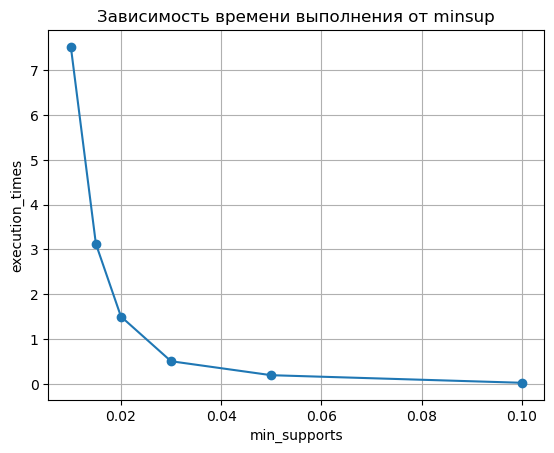

In [76]:
plt.title("Зависимость времени выполнения от minsup")
plt.xlabel("min_supports")
plt.ylabel("execution_times")
plt.grid()
plt.plot(min_supports, execution_times, marker='o')
plt.show()

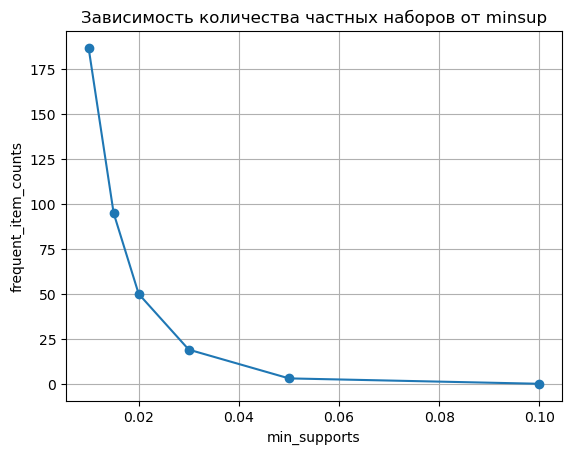

In [77]:
plt.title("Зависимость количества частных наборов от minsup")
plt.xlabel("min_supports")
plt.ylabel("frequent_item_counts")
plt.grid()
plt.plot(min_supports, frequent_item_counts, marker='o')
plt.show()